Юдин Александр 23.М08



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем обучающую выборку.



1. GRE Scores ( из 340 )
2. TOEFL Scores ( из 120 )
3. University Rating ( из 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( из 5 )
5. Undergraduate GPA ( из 10 )
6. Research Experience (  0 или 1 )
7. Chance of Admit ( от 0 до 1 )

In [ ]:
df = pd.read_csv('/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

В данной выборке нам не нужен параметр "Serial No."

In [ ]:
df = df.drop(columns=["Serial No."])
df.shape


(400, 8)

In [ ]:
import numpy as np

In [ ]:
class LinReg:
  def __init__(self, n):
    self.w = self.random_initialize_weights(n + 1)

  def random_initialize_weights(self, n, mean=0, std=1):
    return np.random.normal(mean, std, n)

  def predict(self, X):
    m, n = X.shape

    return X.dot(self.w)

  def gradient_descent(self, X, y, learning_rate, lambda_reg, iterations):
    m, n = X.shape

    # Добавляем столбец с единицами для учета начального смещения
    X = np.column_stack([np.ones(m), X])

    for i in range(iterations):
      y_pred = self.predict(X)

      error = y_pred - y  # Вычисляем ошибку предсказания

      if i % 10 == 0:
        print(error.mean())

      # Градиент с регуляризацией L2
      gradient = (2 / m) * X.T.dot(error) + (2 * lambda_reg / m) * self.w

      gradient[0] -= (2 * lambda_reg / m) * self.w[0]  # Не регуляризуем начальное смещение

      # Обновляем веса с учетом градиента
      self.w = self.w - learning_rate * gradient



In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

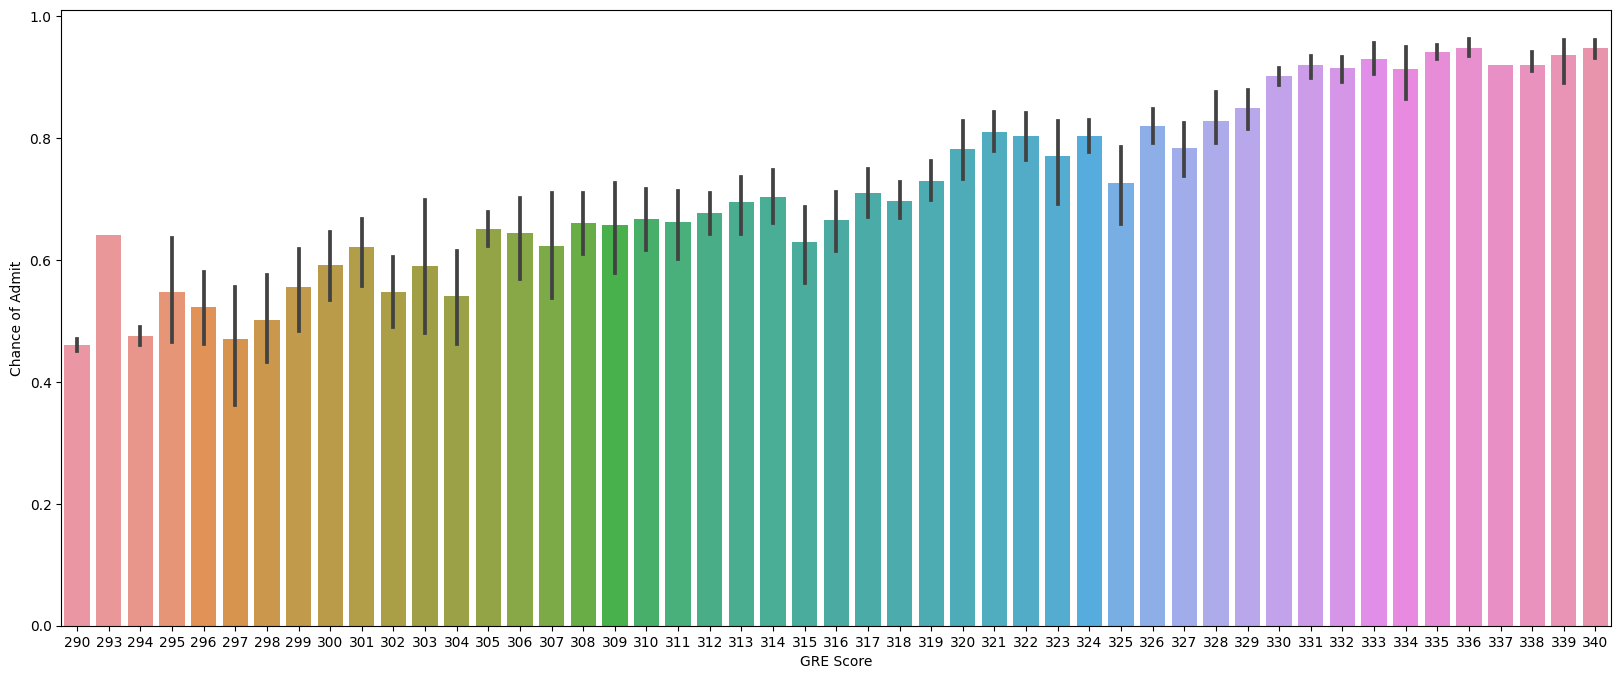

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='GRE Score',y='Chance of Admit',data=df)
plt.show()

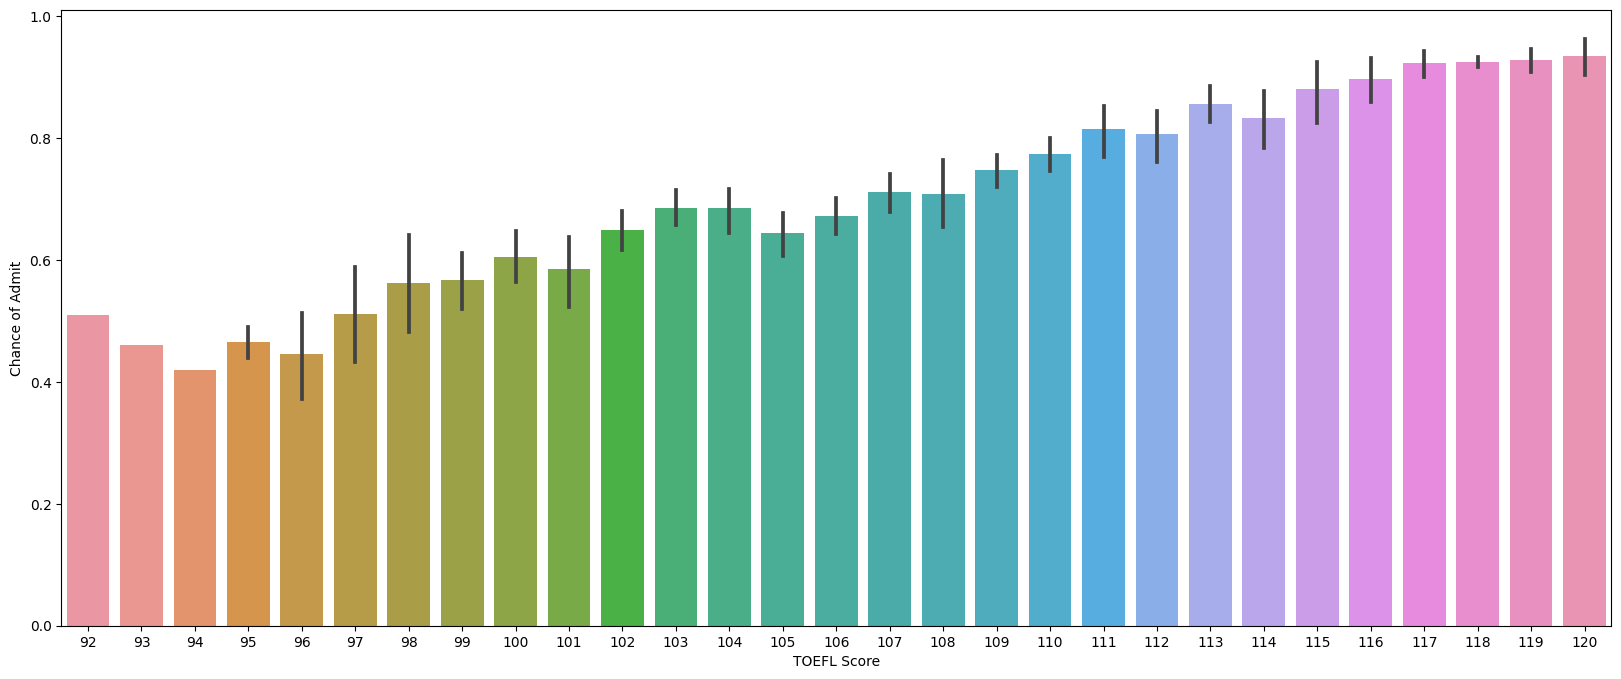

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='TOEFL Score',y='Chance of Admit',data=df)
plt.show()

Из приведенных выше графиков видно, что при более высоких баллах шансы на поступление выше.

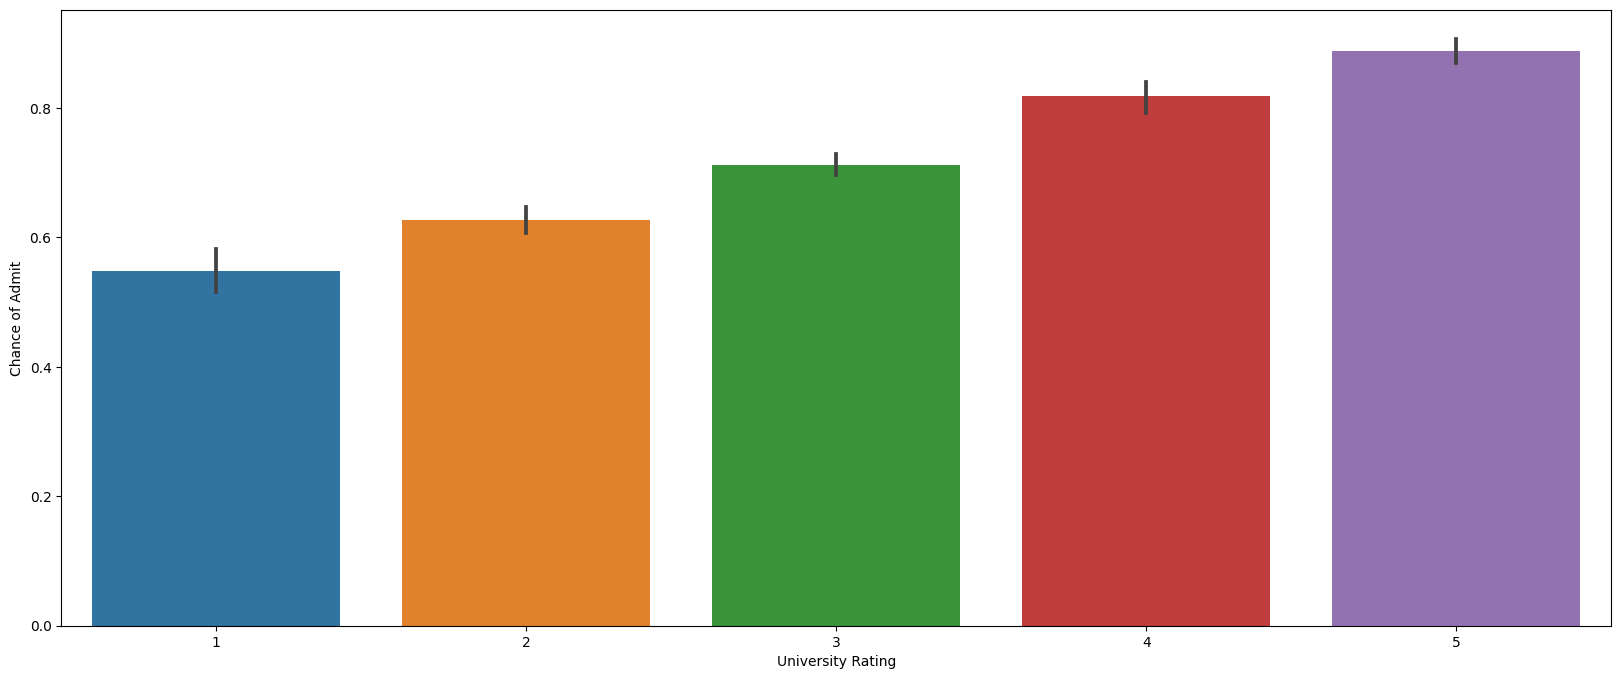

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='University Rating',y='Chance of Admit',data=df)
plt.show()

In [ ]:
df[df["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)

4    61
5    56
3    52
2    10
1     1
Name: University Rating, dtype: int64

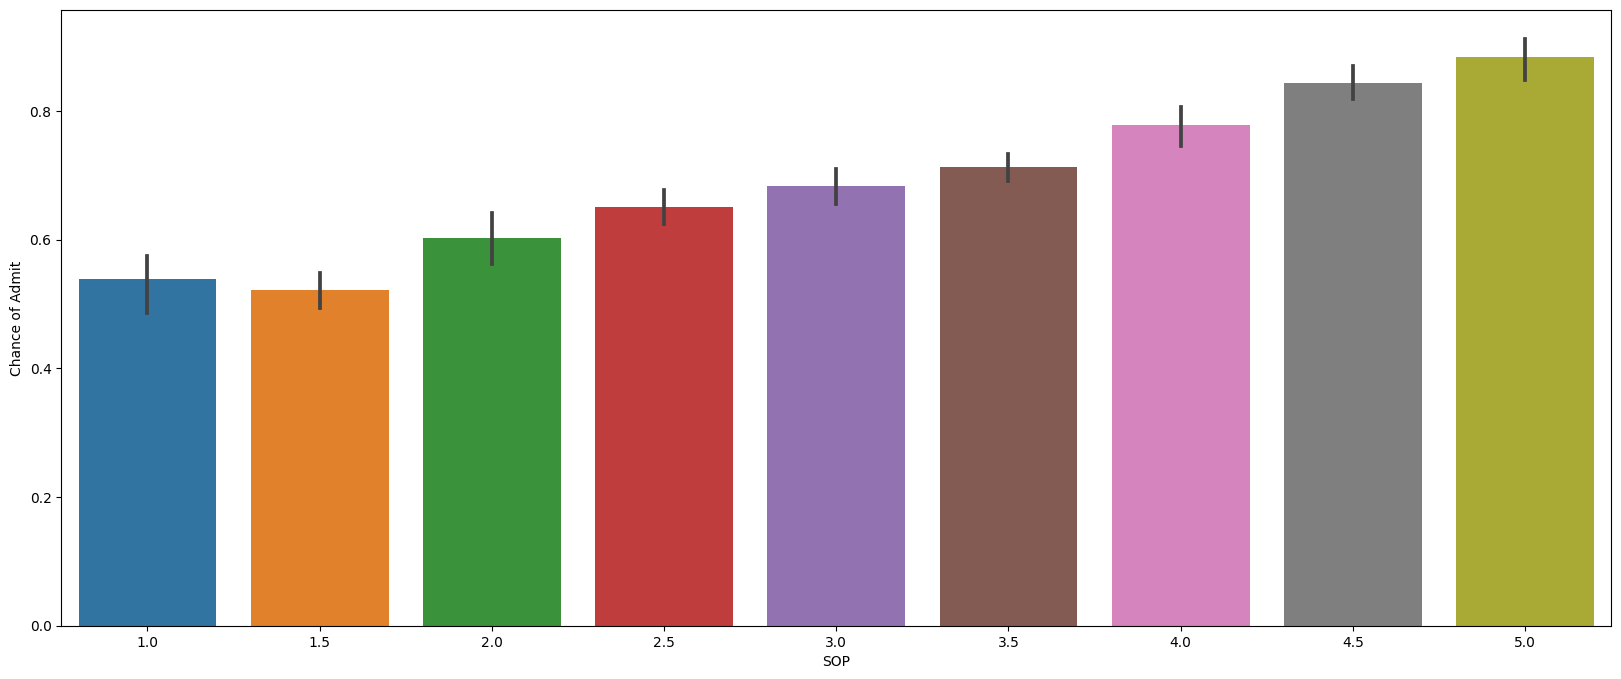

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='SOP',y='Chance of Admit',data=df)
plt.show()

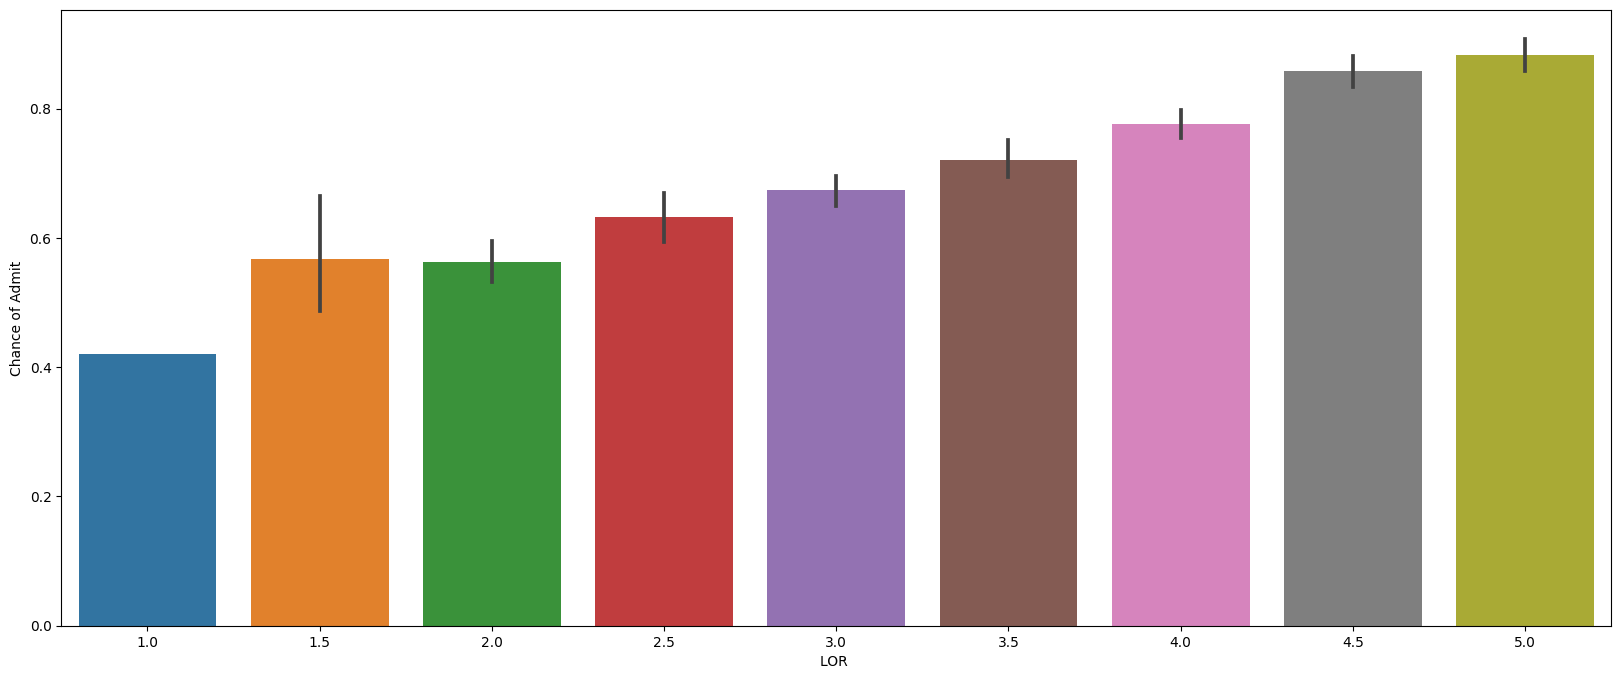

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='LOR ',y='Chance of Admit',data=df)
plt.show()

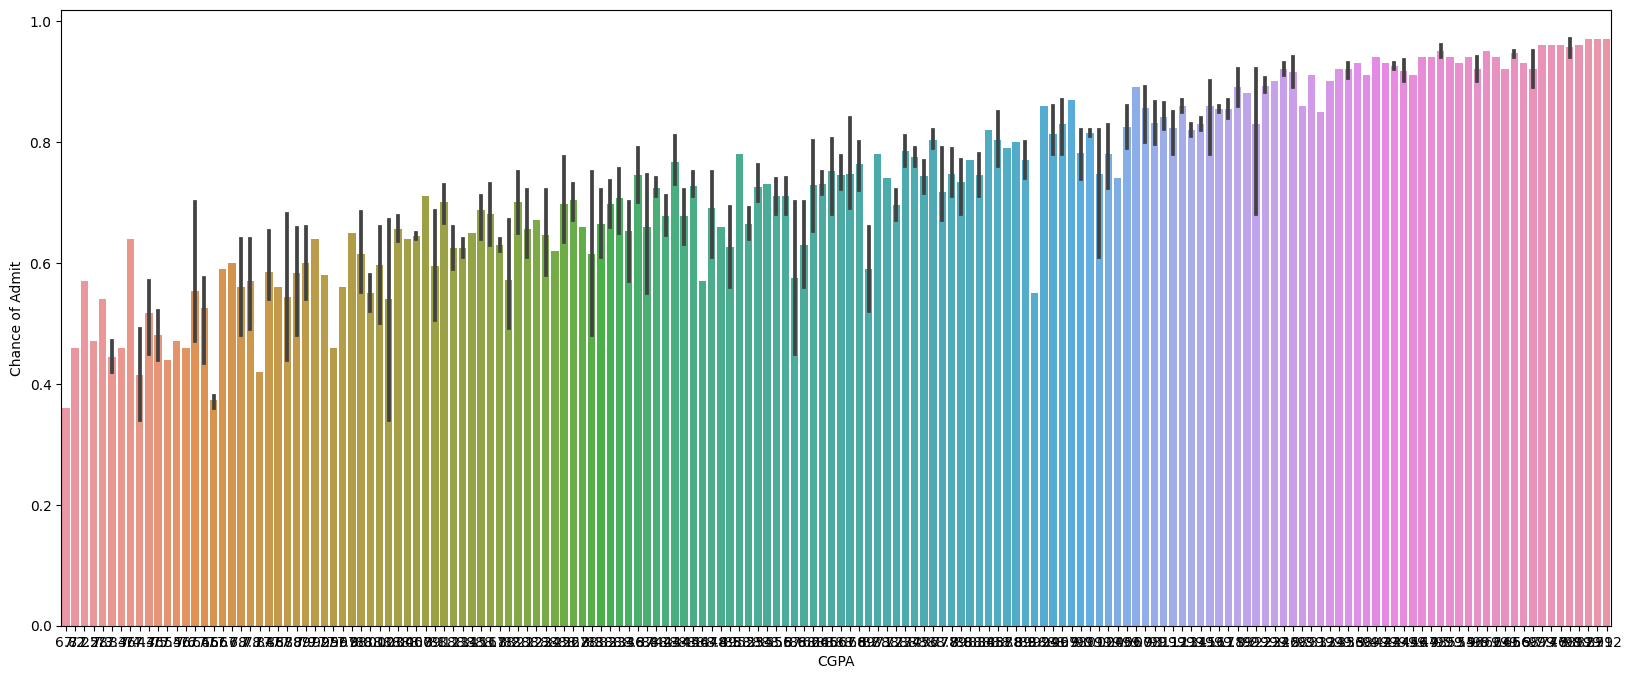

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='CGPA',y='Chance of Admit',data=df)
plt.show()

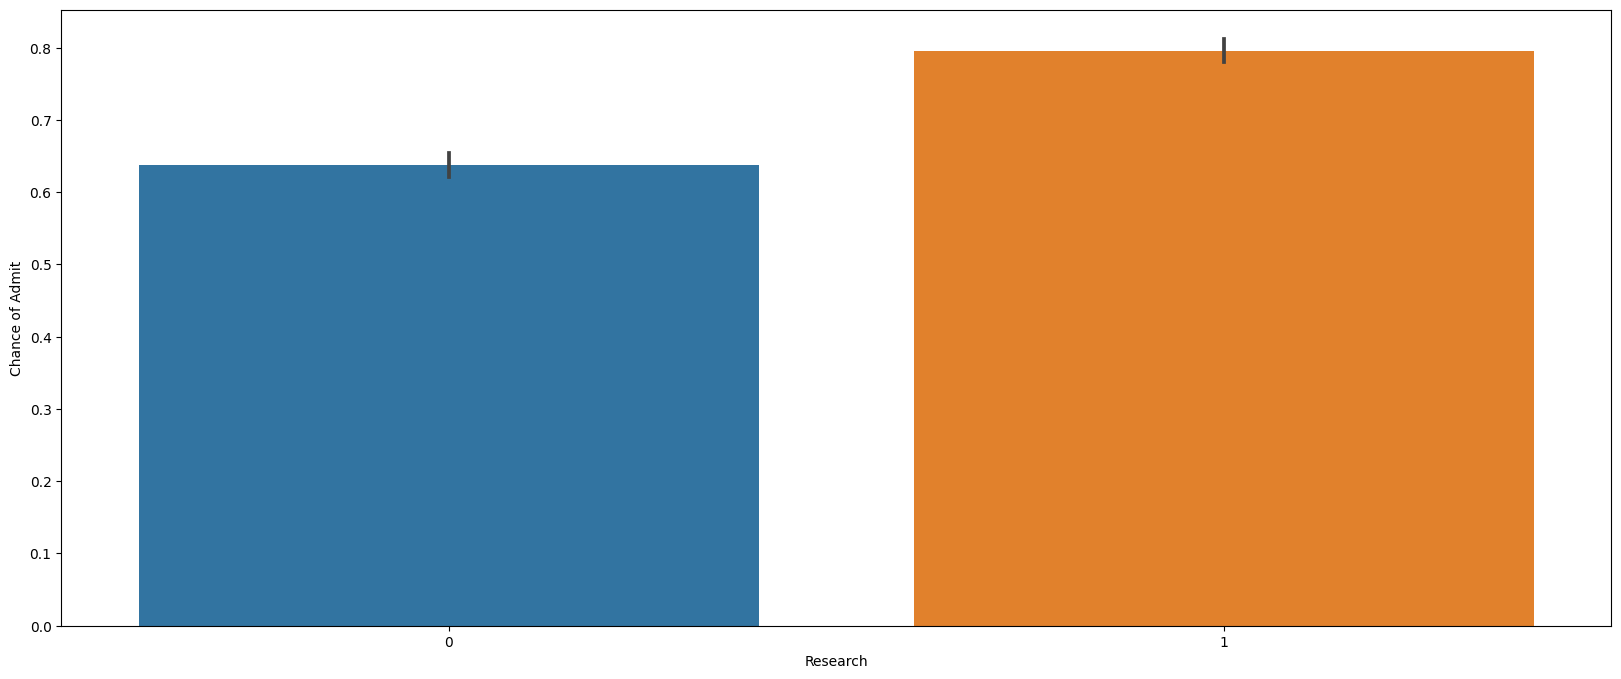

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='Research',y='Chance of Admit',data=df)
plt.show()

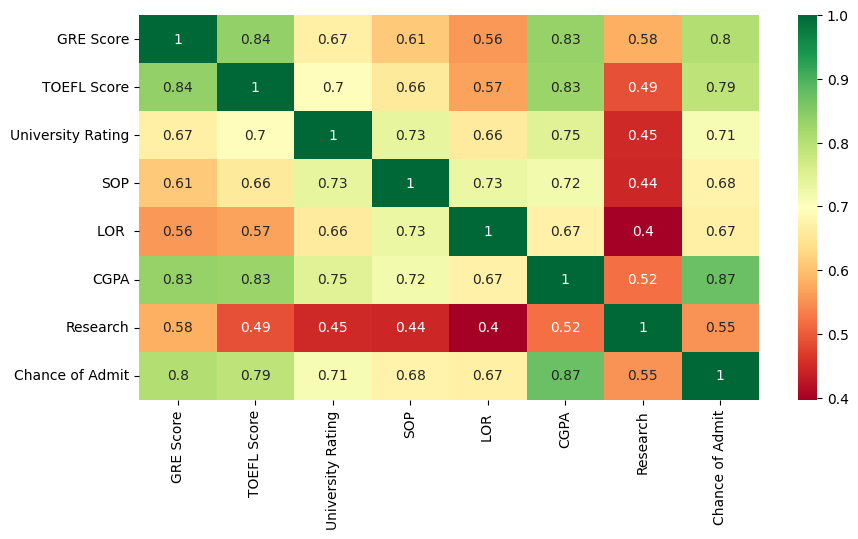

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Из полученных графиков можно сделать вывод, что чем выше показатели поступающего, тем больше шансов у него поступить. Также, стоит отметить, что присутствует сильная корреляция признаков GRE Score, TOEFL Score, CGPA Score.

In [ ]:
from sklearn.model_selection import train_test_split

Разбиваем на обучающую и тестовую выборки.

In [ ]:
y = df["Chance of Admit"]
X = df.drop(columns=["Chance of Admit"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Используем масштабирование

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled.shape

(280, 7)

In [ ]:
y_train = y_train.to_numpy()

In [ ]:
lin_reg = LinReg(X_train_scaled.shape[1])

Обучаем нашу модель, ошибка выводится каждые 10 итераций.

In [ ]:
lin_reg.gradient_descent(X_train_scaled, y_train, 0.01, 10, 10000)

-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.721434189112415e-15
-2.72143418

Тестируем нашу модель, выводим метрики

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

m1 = X_train_scaled.shape[0]
X_train_scaled = np.column_stack([np.ones(m1), X_train_scaled])
m2 = X_test_scaled.shape[0]
X_test_scaled = np.column_stack([np.ones(m2), X_test_scaled])

y_train_pred = lin_reg.predict(X_train_scaled)  # использование модели для предсказания на обучающей
y_test_pred = lin_reg.predict(X_test_scaled)  # или на тестовой выборке

print("Test RMSE =", mean_squared_error(y_test, y_test_pred, squared=False))
print("Test MSE =", mean_squared_error(y_test, y_test_pred, squared=True))
print("Test R2 =", r2_score(y_test, y_test_pred))
print("Train RMSE =", mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE =", mean_squared_error(y_train, y_train_pred, squared=True))
print("Train R2 =", r2_score(y_train, y_train_pred))

Test RMSE = 0.06845319719332543
Test MSE = 0.004685840205988297
Test R2 = 0.7941486420400613
Train RMSE = 0.061621872555078505
Train MSE = 0.003797255177194337
Train R2 = 0.8012415321099329


Далее, тестируем модель существующей библиотеки sklearn.

In [ ]:
y = df["Chance of Admit"]
X = df.drop(columns=["Chance of Admit"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()  # выбранная модель

model.fit(X_train_scaled, y_train)  # обучение модели на обучающей выборке

y_train_pred = model.predict(X_train_scaled)  # использование модели для предсказания на обучающей
y_test_pred = model.predict(X_test_scaled)  # или на тестовой выборке

print("Test RMSE =", mean_squared_error(y_test, y_test_pred, squared=False))
print("Test MSE =", mean_squared_error(y_test, y_test_pred, squared=True))
print("Test R2 =", r2_score(y_test, y_test_pred))
print("Train RMSE =", mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE =", mean_squared_error(y_train, y_train_pred, squared=True))
print("Train R2 =", r2_score(y_train, y_train_pred))

Test RMSE = 0.06822748034449018
Test MSE = 0.0046549890741577945
Test R2 = 0.7955039480476784
Train RMSE = 0.061508763976398956
Train MSE = 0.0037833280459043535
Train R2 = 0.8019705153223138


Можно сделать вывод, что наша модель показывает хорошие результаты.

Теперь, подберем наилучшее количество признаков.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

y = df["Chance of Admit"]
X = df.drop(columns=["Chance of Admit"])
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_

array([False,  True,  True, False,  True,  True,  True])

In [ ]:
selector.ranking_

array([2, 1, 1, 3, 1, 1, 1])

Это подтверждает то, что писалось ранее. Из-за сильной корреляции признак GRE Score нам не очень нужен.

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % -x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 0.0760
	0.0600
	0.0676
	0.0689
	0.0461
Mean CV MSE = 0.0637


In [ ]:
y_train = y_train.to_numpy()

In [ ]:
from sklearn.model_selection import KFold

y = df["Chance of Admit"]
X = df.drop(columns=["Chance of Admit"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled_fit = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled_fit = scaler.transform(X_test)
y_train = y_train.to_numpy()

results = pd.DataFrame(index=[
    'mse-train', 'mse-test', 'rmse-train', 'rmse-test', 'r2-train', 'r2-test'
])

n_folds=5
kfold_cv = KFold(n_splits=n_folds)

splited = kfold_cv.split(X=X_train, y=y_train)

for fold, (train, test) in enumerate(splited):
    _x_train_fit = X_train_scaled_fit[train, :]
    _x_train_pred = X_train_scaled[train, :]
    _x_test =  X_train_scaled[test, :]
    _y_train = y_train[train]
    _y_test = y_train[test]

    W = lin_reg.gradient_descent(_x_train_fit, _y_train, 0.01, 0.1, 10000)

    _y_pred_train = lin_reg.predict(_x_train_pred)
    _y_pred_test =  lin_reg.predict(_x_test)

    mse_train = mean_squared_error(_y_train, _y_pred_train, squared=True)
    mse_test = mean_squared_error(_y_test, _y_pred_test, squared=True)

    rmse_train = mean_squared_error(_y_train, _y_pred_train, squared=False)
    rmse_test = mean_squared_error(_y_test, _y_pred_test, squared=False)

    r2_train = r2_score(_y_train, _y_pred_train)
    r2_test = r2_score(_y_test, _y_pred_test)

    results.insert(loc=fold, column=f"Fold{fold + 1}", value=[
        mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test
    ])

results["E"] = results.mean(axis=1)
results["STD"] = results.std(axis=1)

results

2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.667013435494628e-15
2.66701343

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,0.003383,0.003867,0.003637,0.003590,0.004225,0.003741,0.000287
mse-test,0.005774,0.003615,0.004589,0.004740,0.002136,0.004171,0.001226
rmse-train,0.058165,0.062187,0.060307,0.059920,0.065000,0.061116,0.002325
rmse-test,0.075986,0.060121,0.067742,0.068848,0.046218,0.063783,0.010121
r2-train,0.815834,0.807628,0.813826,0.807310,0.775198,0.803959,0.014767
r2-test,0.731979,0.754769,0.734238,0.772740,0.891586,0.777062,0.059157


На тренировочной выборке метрики меньше, но различия небольшие, поэтому можно считать, что обучились успешно

Text(0, 0.5, 'CV score')

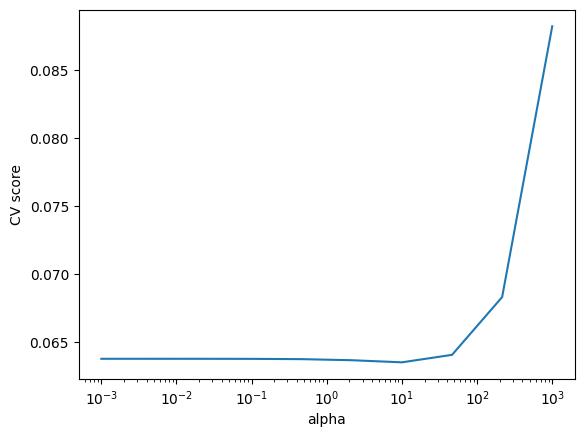

In [ ]:
from sklearn.model_selection import GridSearchCV

alpha_grid = np.logspace(-3, 3, 10)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [ ]:
best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 10.0000
